# 안녕하세요^^ 
## AIVLE 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

## 개인과제
* 데이터 구조, 분포 확인, 전처리 : 1.1_버스정류장데이터 / 1.2 유동인구데이터 / 1.3_주민등록데이터 / 1.4_업종등록데이터
* 데이터간 관계 가설 수립 및 검증 : 1.5_데이터 분석

---

# 데이터 분석부터 먼저 시작해보겠습니다.
## "구별 업종 등록 데이터" 를 확인해 보도록 하겠습니다

In [79]:
# 필요 라이브러리부터 설치합니다.
#%pip install pandas seaborn

## 기본전제
* 처음에 제공되는 기본/추가 데이터는 'raw_data' 폴더에 있습니다.

[기본 데이터]
* business_type.csv

[데이터 소개]
* 서울 시 구별 등록 업종 상위 10개 데이터
    * 택시운송업
    * 한식일반음식점업
    * 용달 화물자동차 운송업
    * 부동산 중개 및 대리업
    * 두발미용업
    * 커피전문점
    * 남녀용 겉옷 및 셔츠 도매업
    * 기타주점업
    * 일반 교과 학원
    * 한식 육류요리 전문점

[변수 소개]
* 다수 업종 상위 1~10

---

# 1.데이터 불러오기
## 모든 미니 프로젝트의 시작은 '데이터 불러오기' 부터라고 할 수 있습니다.
+ KeyPoint : 불러오고자 하는 데이터에 따라 자유롭게 변수로 지정할 수 있다.

###  데이터 프레임을 불러오고 변수로 저장(여기서는 CSV 기준으로 진행)
* csv : pd.read_csv("파일이름. csv")
* txt : pd.read_csv("파일이름. csv", sep="구분자")
* xlsx : pd.read_excel('파일이름.xlsx')
* pickle : pd.read_pickle("파일이름.pkl") <br>
 [참고] pickle은 파이썬의 모든 객체를 파일로 저장할 수 있는 방법으로 DataFrame,List,Dict 등 모든 객체 저장 가능(특히 sklearn라이브러리를 통해 모델을 학습시키고, 저장할 때 많이 사용)

## 기본전제
* 처음에 제공되는 데이터는 'raw_data' 폴더에 있습니다.

[기본 데이터]
* 1.4 business_type.csv

[데이터 소개]
* 서울시 업종 등록 데이터

#### [실습문제1] 데이터 로딩
* '1.4 business_type.csv'파일을 'seoul_business' 변수에 저장하고 그 데이터를 확인하세요.
    * 데이터 파일 로딩시 참고 사항 
        * 구분자(sep)는 ',' 입니다
        * UTF-8 인코더를 사용해 주세요

In [80]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
import pandas as pd
seoul_business = pd.read_csv('./0213_dataset/1.4 business_type.csv',sep=',',encoding='UTF-8')

In [81]:
# 데이터 프레임의 Shape을 확인합니다.
seoul_business.shape

(451, 22)

---

# 2.기본 정보 확인 및 클렌징

+ 데이터 클렌징 : 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정

#### [실습문제2] 기본 정보 확인하기
* 'seoul_moving' 데이터의 정보를 확인해보세요.
* 'describe', 'info', 'head' 등 전부 활용해 보겠습니다.

In [82]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_business.describe()

,자치구,동,다수업종 상위10,다수업종 상위10.1,다수업종 상위10.2,다수업종 상위10.3,다수업종 상위10.4,다수업종 상위10.5,다수업종 상위10.6,다수업종 상위10.7,...,다수업종 상위10.10,다수업종 상위10.11,다수업종 상위10.12,다수업종 상위10.13,다수업종 상위10.14,다수업종 상위10.15,다수업종 상위10.16,다수업종 상위10.17,다수업종 상위10.18,다수업종 상위10.19
count,451,451,451,451,451,451,451,451,451,451,...,451,451,451,451,451,451,451,451,451,451
unique,27,425,226,280,176,305,177,180,142,205,...,131,239,69,147,127,189,113,222,107,230
top,송파구,소계,71,11,24,104,56,56,40,54,...,13,16,-,-,18,20,4,42,17,45
freq,28,25,7,7,11,6,8,9,11,9,...,18,8,82,82,14,10,15,10,16,9


In [83]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_business.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   자치구           451 non-null    object
 1   동             451 non-null    object
 2   다수업종 상위10     451 non-null    object
 3   다수업종 상위10.1   451 non-null    object
 4   다수업종 상위10.2   451 non-null    object
 5   다수업종 상위10.3   451 non-null    object
 6   다수업종 상위10.4   451 non-null    object
 7   다수업종 상위10.5   451 non-null    object
 8   다수업종 상위10.6   451 non-null    object
 9   다수업종 상위10.7   451 non-null    object
 10  다수업종 상위10.8   451 non-null    object
 11  다수업종 상위10.9   451 non-null    object
 12  다수업종 상위10.10  451 non-null    object
 13  다수업종 상위10.11  451 non-null    object
 14  다수업종 상위10.12  451 non-null    object
 15  다수업종 상위10.13  451 non-null    object
 16  다수업종 상위10.14  451 non-null    object
 17  다수업종 상위10.15  451 non-null    object
 18  다수업종 상위10.16  451 non-null    object
 19  다수업종 상위1

In [84]:
seoul_business.head(5)

,자치구,동,다수업종 상위10,다수업종 상위10.1,다수업종 상위10.2,다수업종 상위10.3,다수업종 상위10.4,다수업종 상위10.5,다수업종 상위10.6,다수업종 상위10.7,...,다수업종 상위10.10,다수업종 상위10.11,다수업종 상위10.12,다수업종 상위10.13,다수업종 상위10.14,다수업종 상위10.15,다수업종 상위10.16,다수업종 상위10.17,다수업종 상위10.18,다수업종 상위10.19
0,자치구,동,택시운송업,택시운송업,한식 일반 음식점업,한식 일반 음식점업,용달 화물자동차 운송업,용달 화물자동차 운송업,부동산 중개 및 대리업,부동산 중개 및 대리업,...,커피전문점,커피전문점,남녀용 겉옷 및 셔츠 도매업,남녀용 겉옷 및 셔츠 도매업,기타주점업,기타주점업,일반 교과 학원,일반 교과 학원,한식 육류요리 전문점,한식 육류요리 전문점
1,자치구,동,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,...,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수
2,합계,합계,"47,176","76,701","29,225","100,183","28,494","29,356","24,013","42,636",...,"16,255","57,322","13,388","51,116","13,339","31,371","11,911","50,773","11,109","44,653"
3,종로구,소계,215,215,"1,548","5,912",618,646,549,889,...,948,"3,613",400,962,537,"1,413",110,382,437,"1,982"
4,종로구,사직동,7,7,230,982,12,12,57,96,...,124,525,2,18,74,177,9,34,45,220


#### [실습문제3] 데이터 확인 및 처리

* 데이터를 보았을때, 어느 데이터를 가져와야 할지 생각 해 봅시다.

In [85]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_business = pd.read_csv('./0213_dataset/1.4 business_type.csv',sep=',',encoding='UTF-8',header=1)#이상한거 없애기
seoul_business = seoul_business[2:] #합계제거
seoul_business.head(5)

,자치구,동,택시운송업,택시운송업.1,한식 일반 음식점업,한식 일반 음식점업.1,용달 화물자동차 운송업,용달 화물자동차 운송업.1,부동산 중개 및 대리업,부동산 중개 및 대리업.1,...,커피전문점,커피전문점.1,남녀용 겉옷 및 셔츠 도매업,남녀용 겉옷 및 셔츠 도매업.1,기타주점업,기타주점업.1,일반 교과 학원,일반 교과 학원.1,한식 육류요리 전문점,한식 육류요리 전문점.1
2,종로구,소계,215,215,"1,548","5,912",618,646,549,889,...,948,"3,613",400,962,537,"1,413",110,382,437,"1,982"
3,종로구,사직동,7,7,230,982,12,12,57,96,...,124,525,2,18,74,177,9,34,45,220
4,종로구,삼청동,5,5,42,145,4,4,9,10,...,66,243,2,3,3,8,-,-,7,33
5,종로구,부암동,22,22,26,100,9,9,17,26,...,24,62,3,6,7,23,16,59,3,15
6,종로구,평창동,10,10,31,116,11,11,33,52,...,19,62,2,4,26,54,25,71,10,103


In [86]:
# 동 = '소계' 인것들 제거
seoul_business = seoul_business.loc[seoul_business['동']!='소계']
seoul_business.head(2)

,자치구,동,택시운송업,택시운송업.1,한식 일반 음식점업,한식 일반 음식점업.1,용달 화물자동차 운송업,용달 화물자동차 운송업.1,부동산 중개 및 대리업,부동산 중개 및 대리업.1,...,커피전문점,커피전문점.1,남녀용 겉옷 및 셔츠 도매업,남녀용 겉옷 및 셔츠 도매업.1,기타주점업,기타주점업.1,일반 교과 학원,일반 교과 학원.1,한식 육류요리 전문점,한식 육류요리 전문점.1
3,종로구,사직동,7,7,230,982,12,12,57,96,...,124,525,2,18,74,177,9,34,45,220
4,종로구,삼청동,5,5,42,145,4,4,9,10,...,66,243,2,3,3,8,-,-,7,33


In [87]:
# index 이상해졌으니까 reset
seoul_business.reset_index(drop=True,inplace=True)
seoul_business.head(2)

,자치구,동,택시운송업,택시운송업.1,한식 일반 음식점업,한식 일반 음식점업.1,용달 화물자동차 운송업,용달 화물자동차 운송업.1,부동산 중개 및 대리업,부동산 중개 및 대리업.1,...,커피전문점,커피전문점.1,남녀용 겉옷 및 셔츠 도매업,남녀용 겉옷 및 셔츠 도매업.1,기타주점업,기타주점업.1,일반 교과 학원,일반 교과 학원.1,한식 육류요리 전문점,한식 육류요리 전문점.1
0,종로구,사직동,7,7,230,982,12,12,57,96,...,124,525,2,18,74,177,9,34,45,220
1,종로구,삼청동,5,5,42,145,4,4,9,10,...,66,243,2,3,3,8,-,-,7,33


In [88]:
# 해당 데이터프레임을 'df_seoul_business.csv' 파일로 저장하세요.
seoul_business.to_csv('./df_seoul_business.csv')

---

# 3.데이터 분석하기
+ KeyPoint : 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별할 수 있다.
  * 데이터들의 패턴 탐색
  * 변수들간의 관계 파악

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화 한글폰트 설정
# 맑은 고딕

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

# scipy
import scipy.stats as spst

#### [실습문제4] 데이터 분포 알아보기
* 다양한 변수를 기준으로 그래프를 그려보고 인사이트를 도출해보세요.

In [90]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_business.columns

Index(['자치구', '동', '택시운송업', '택시운송업.1', '한식 일반 음식점업', '한식 일반 음식점업.1',
       '용달 화물자동차 운송업', '용달 화물자동차 운송업.1', '부동산 중개 및 대리업', '부동산 중개 및 대리업.1',
       '두발미용업', '두발미용업.1', '커피전문점', '커피전문점.1', '남녀용 겉옷 및 셔츠 도매업',
       '남녀용 겉옷 및 셔츠 도매업.1', '기타주점업', '기타주점업.1', '일반 교과 학원', '일반 교과 학원.1',
       '한식 육류요리 전문점', '한식 육류요리 전문점.1'],
      dtype='object')

<AxesSubplot:xlabel='Count', ylabel='자치구'>

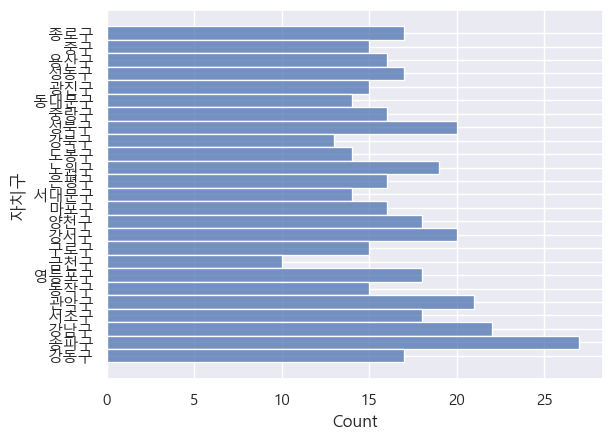

In [91]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
sns.histplot(seoul_business,y='자치구')

In [92]:
seoul_business['커피전문점'] = seoul_business['커피전문점'].str.replace(',', '')
seoul_business['커피전문점.1'] = seoul_business['커피전문점.1'].str.replace(',', '')
seoul_business['커피전문점'] = pd.to_numeric(seoul_business['커피전문점'])
seoul_business['커피전문점.1'] = pd.to_numeric(seoul_business['커피전문점.1'])
#커피전문점을 정수형으로 변환

In [93]:
seoul_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   자치구                423 non-null    object
 1   동                  423 non-null    object
 2   택시운송업              423 non-null    object
 3   택시운송업.1            423 non-null    object
 4   한식 일반 음식점업         423 non-null    object
 5   한식 일반 음식점업.1       423 non-null    object
 6   용달 화물자동차 운송업       423 non-null    object
 7   용달 화물자동차 운송업.1     423 non-null    object
 8   부동산 중개 및 대리업       423 non-null    object
 9   부동산 중개 및 대리업.1     423 non-null    object
 10  두발미용업              423 non-null    object
 11  두발미용업.1            423 non-null    object
 12  커피전문점              423 non-null    int64 
 13  커피전문점.1            423 non-null    int64 
 14  남녀용 겉옷 및 셔츠 도매업    423 non-null    object
 15  남녀용 겉옷 및 셔츠 도매업.1  423 non-null    object
 16  기타주점업              423 non-null    object
 1

In [94]:
new = seoul_business.groupby('자치구')['커피전문점','커피전문점.1'].sum()
new.head(5)

c:\Users\sagvd17\Anaconda3\envs\jpytorch\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,커피전문점,커피전문점.1
자치구,,
강남구,1624,7273
강동구,546,1660
강북구,358,1095
강서구,690,2530
관악구,581,2049


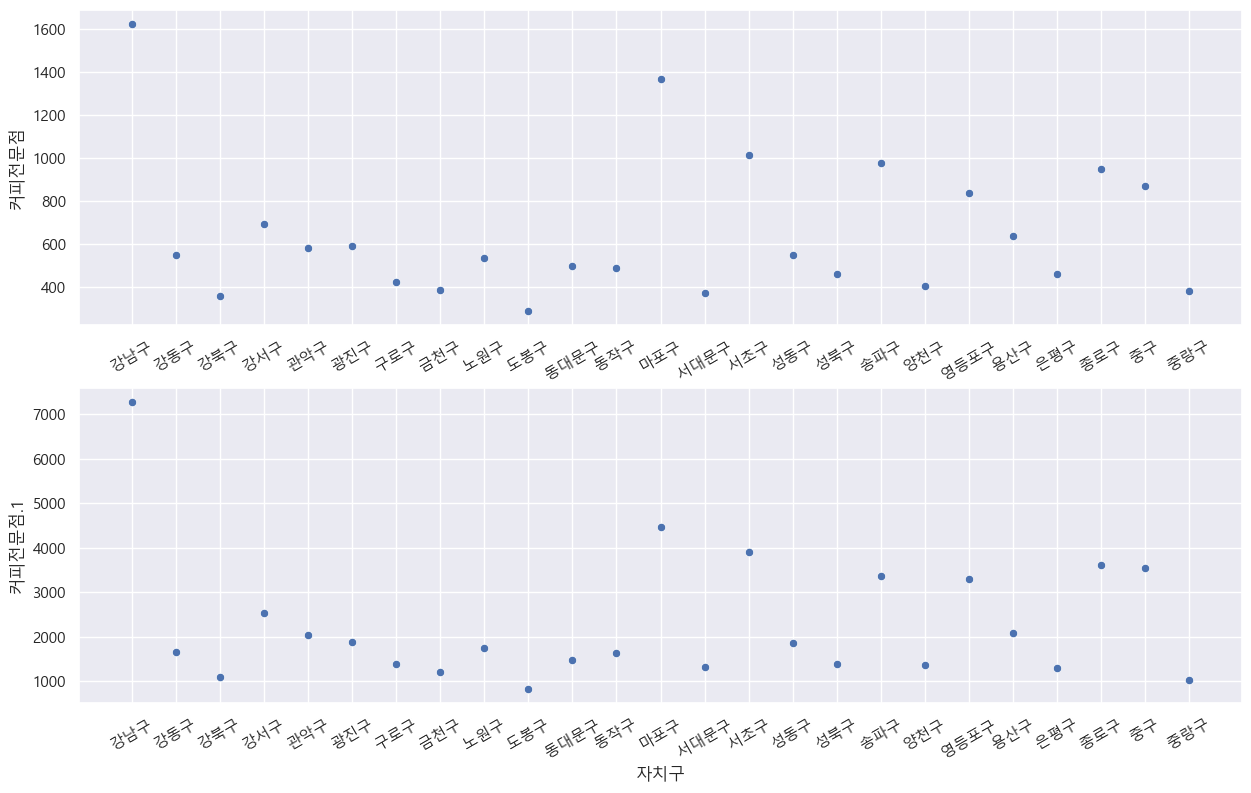

In [95]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
plt.figure(figsize=(15,9))
plt.subplot(2,1,1)
plt.xticks(rotation=30)
sns.scatterplot(data=new,x='자치구',y='커피전문점')
plt.subplot(2,1,2)
sns.scatterplot(data=new,x='자치구',y='커피전문점.1')
plt.xticks(rotation=30)
plt.show()

In [96]:
seoul_business['기타주점업'] = seoul_business['기타주점업'].str.replace(',', '')
seoul_business['기타주점업.1'] = seoul_business['기타주점업.1'].str.replace(',', '')
seoul_business['기타주점업'] = seoul_business['기타주점업'].str.replace('-', '0')
seoul_business['기타주점업.1'] = seoul_business['기타주점업.1'].str.replace('-', '0')
seoul_business['기타주점업'] = pd.to_numeric(seoul_business['기타주점업'])
seoul_business['기타주점업.1'] = pd.to_numeric(seoul_business['기타주점업.1'])
new2 = seoul_business.groupby('자치구')['기타주점업','기타주점업.1'].sum()
new2.head(5)

c:\Users\sagvd17\Anaconda3\envs\jpytorch\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


,기타주점업,기타주점업.1
자치구,,
강남구,713,2528
강동구,589,1349
강북구,580,1275
강서구,794,1709
관악구,658,1672


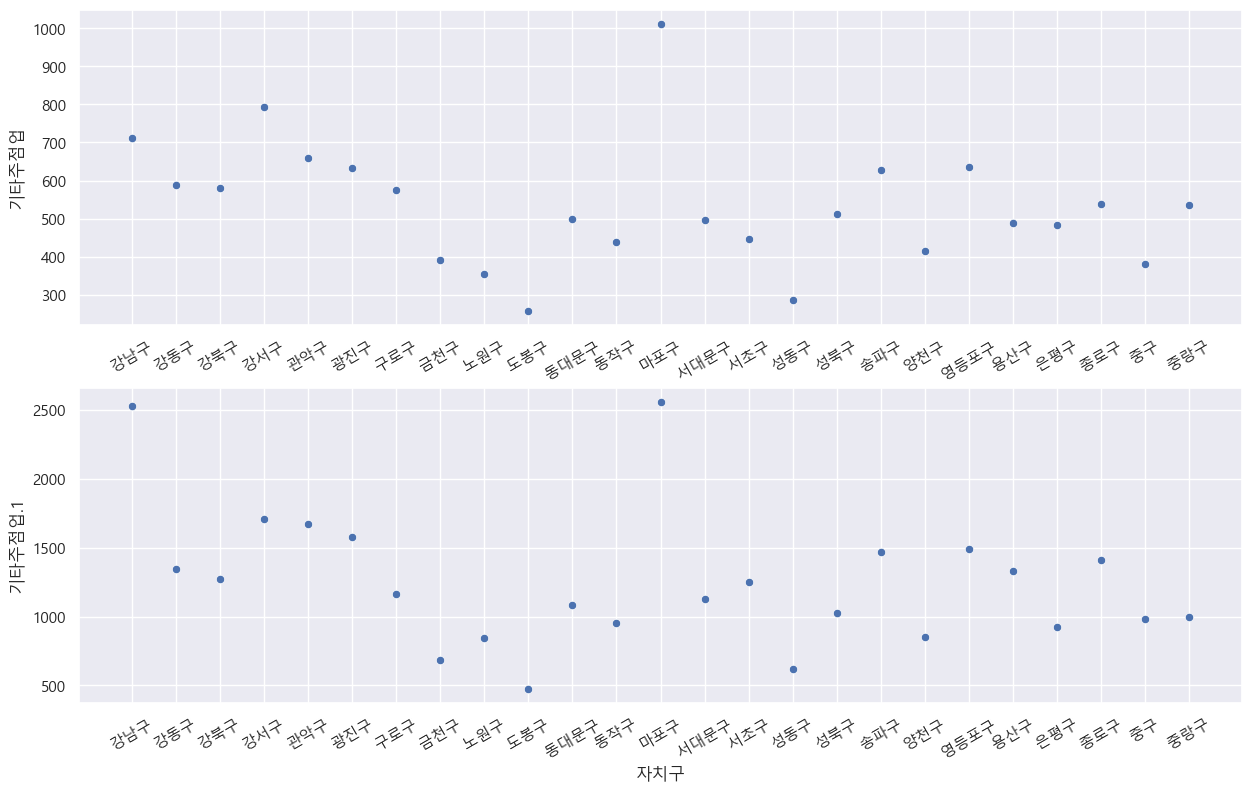

In [99]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
plt.figure(figsize=(15,9))
plt.subplot(2,1,1)
plt.xticks(rotation=30)
sns.scatterplot(data=new2,x='자치구',y='기타주점업')
plt.subplot(2,1,2)
sns.scatterplot(data=new2,x='자치구',y='기타주점업.1')
plt.xticks(rotation=30)
plt.show()

In [97]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 커피전문점은 강남>>마포>서초 - 주간에 사람들이 많이갈것이라고 생각된다
# 2. 주점은 마포>강남>>>강서,관악,광진.. - 야간에 사람들이 많이 갈 것
# 3.

---